<a href="https://colab.research.google.com/github/Mohammad-Sabbir-Ahmed/Capstone-Project-Neurodegenerative-Disease-Detection-Using-Deep-Learning/blob/main/Capstone%3A%20Alzheimer%2C%20Parkinson%2C%20%26%20Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2
from PIL import Image

!pip install pydicom
import pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 32.6 MB/s 


In [ ]:
# mount google drive with colab
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')
!rm -rf sample_data/ # removiing sample_data folder

Mounted at /content/gdrive


# Prepraing Parkinson's Dataset

In [ ]:
!rm -rf /content/dataset

In [ ]:
# making 
!mkdir -p /content/dataset/H-V-A/Alzheimer /content/dataset/H-V-A/Healthy
!mkdir -p /content/dataset/H-V-D/Dementia /content/dataset/H-V-D/Healthy
!mkdir -p /content/dataset/H-V-P/Parkinson /content/dataset/H-V-P/Healthy

!mkdir -p /content/dataset/A-V-D/Alzheimer /content/dataset/A-V-D/Dementia
!mkdir -p /content/dataset/A-V-P/Alzheimer /content/dataset/A-V-P/Parkinson
!mkdir -p /content/dataset/D-V-P/Parkinson /content/dataset/D-V-P/Dementia

In [ ]:
# Parkinson: Creating directory to store raw & clean data
# !mkdir -p '/content/dataset/parkinson/'
!unzip "/content/gdrive/MyDrive/Colab Notebooks/Capstone[CSE 498]/Dataset/Parkinson's (PPMI).zip" -d '/content/dataset/H-V-P/Parkinson'
!find "/content/dataset/H-V-P/Parkinson/Parkinson's (PPMI)" -mindepth 0 -type f -print -exec mv {} '/content/dataset/H-V-P/Parkinson' \;
!rm -rf "/content/dataset/H-V-P/Parkinson/Parkinson's (PPMI)/"

In [ ]:
inputdir = '/content/dataset/H-V-P/Parkinson/'

height = 208
width = 176
dim = (width, height)

#Converting .dcm to .jpg
test_list = [ f for f in  os.listdir(inputdir)]
i = 1
for f in test_list[:]:   # remove "[:]" to convert all images
  path = inputdir + '/' + f
  if(os.path.isdir(path) is False):
    ds = pydicom.read_file(path) # read dicom image
    img = ds.pixel_array # get image arrayimg = np.array(img, dtype = float) 
    img = (img - img.min()) / (img.max() - img.min()) * 255.0  
    img = img.astype(np.uint8)
    # apply guassian blur on src image
    gaussian_blurred_image = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
    cropped_image = cv2.resize(gaussian_blurred_image, dim, interpolation=cv2.INTER_LINEAR)
    #saving cropped image to ('/content/dataset/H-V-P/Parkinson/' directory
    path = inputdir + '/' + f.replace('.dcm','.jpg')
    cv2.imwrite(path, cropped_image)
    new_path = inputdir + '/' + 'parkinson-' + str(i) + '.jpg'
    os.rename(path, new_path)
    i = i+1

!rm /content/dataset/H-V-P/Parkinson/*.dcm
!cp /content/dataset/H-V-P/Parkinson/* /content/dataset/A-V-P/Parkinson
!cp /content/dataset/H-V-P/Parkinson/* /content/dataset/D-V-P/Parkinson
# !cp /content/dataset/parkinson/* /content/dataset/H-V-P/Parkinson

In [ ]:
# inputdir = '/content/dataset/H-V-P/Parkinson/'
# test_list = [ f for f in  os.listdir(inputdir)]

# for f in test_list[:10]:
#   path = inputdir + '/' + f
#   # print(path)
#   im = Image.open(path)
#   width, height = im.size
#   print(height, width)


# Preparing Alzheimer's Dataset

In [ ]:
# Creating directory to store raw & clean data

!unzip '/content/gdrive/MyDrive/Colab Notebooks/Capstone[CSE 498]/Dataset/Alzheimer-MRI.zip' -d '/content/dataset/H-V-A/Alzheimer'

!find "/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI/test/NonDemented" -mindepth 0 -type f -print -exec mv {} '/content/dataset/H-V-A/Healthy' \;
!find "/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI/train/NonDemented/" -mindepth 0 -type f -print -exec mv {} '/content/dataset/H-V-A/Healthy' \;

!rm -rf '/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI/train/NonDemented'
!rm -rf '/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI/test/NonDemented'

!find "/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI" -mindepth 0 -type f -print -exec mv {} '/content/dataset/H-V-A/Alzheimer/' \;
!rm -rf '/content/dataset/H-V-A/Alzheimer/Alzheimer-MRI'


In [ ]:
# Copy Alzheimer's data to all the respectie folder

!cp /content/dataset/H-V-A/Alzheimer/* /content/dataset/A-V-D/Alzheimer
!cp /content/dataset/H-V-A/Alzheimer/* /content/dataset/A-V-P/Alzheimer

In [ ]:
# input_dir = '/content/dataset/H-V-A/Alzheimer/'
# test_list = [ f for f in  os.listdir(input_dir)]
# for img in test_list[:]:
#   path = input_dir + img
#   im = Image.open(path)
#   width, height = im.size
#   print(height, width)

# Preparing Dementia Dataset

In [ ]:
!mkdir -p /content/dataset/H-V-D/Dementia
!tar -xvzf '/content/gdrive/MyDrive/Colab Notebooks/Capstone[CSE 498]/Dataset/Dementia_oasis_cross-sectional_disc1.tar.gz' -C '/content/dataset/H-V-D/Dementia'
!find "/content/dataset/H-V-D/Dementia/disc1/" -mindepth 0 -type f -print -exec mv {} '/content/dataset/H-V-D/Dementia' \;
!rm -rf /content/dataset/H-V-D/Dementia/disc1


In [ ]:
import os
import glob

files = glob.glob('/content/dataset/H-V-D/Dementia/*.gif')
print(len(files))

inputdir = '/content/dataset/H-V-D/Dementia'
test_list = [ f for f in  os.listdir(inputdir)]
test_list[:5]

382


['OAS1_0038_MR1_mpr-1_anon_sag_66.gif',
 'OAS1_0021_MR1_mpr_n4_anon_111_t88_gfc_cor_110.gif',
 'OAS1_0031_MR1_mpr-2_anon_to_OAS1_0031_MR1_mpr-1_anon_t4',
 'OAS1_0030_MR1_mpr-3_anon_to_OAS1_0030_MR1_mpr-1_anon_t4',
 'OAS1_0003_MR1_mpr-3_anon.img']

In [ ]:
# Deleting all files except .gif
import re
import os

for f in test_list[:]:
  # print(f)
  if(re.search(".gif", f) == None):
    try:
      f = inputdir + '/' + f
      # print(f)
      os.remove(f)
    except OSError as e:
      pass
      print("Error: %s : %s" % (f, e.strerror))

test_list = [ f for f in  os.listdir('/content/dataset/H-V-D/Dementia')]
print(len(test_list))
test_list



# Renaming all dementia files
i = 1
for l in test_list[:]:
  new_name = r'/content/dataset/H-V-D/Dementia/dementia-'+str(i)+'.gif'
  oldname = r'/content/dataset/H-V-D/Dementia/' + l
  # print("Old name: ", l)
  # print("New name: ", new_name)
  os.rename(oldname, new_name)
  i = i + 1

# new_list

382


### Converting .gif to .png

In [ ]:
test_list = [ f for f in  os.listdir('/content/dataset/H-V-D/Dementia')]

from PIL import Image

# j = 1
for f in test_list[:]:
  # j = j + 1
  # print("Old name: ", f)
  new_name = f.split(".")[0] + '.jpg'
  # print("New name: ", new_name)
  Image.open('/content/dataset/H-V-D/Dementia/' + f).convert('RGB').save('/content/dataset/H-V-D/Dementia/' + new_name)
  os.remove('/content/dataset/H-V-D/Dementia/' + f)


In [ ]:
# Cropping Dementia images

inputdir = '/content/dataset/H-V-D/Dementia'
test_list = [ f for f in  os.listdir(inputdir)]

import matplotlib.pyplot as plt
height = 208
width = 176
dim = (width, height)

#Converting .dcm to .jpg
test_list = [ f for f in  os.listdir(inputdir)]
i = 1
for f in test_list[:]:   # remove "[:]" to convert all images
  path = inputdir + '/' + f
  if(os.path.isdir(path) is False):
    img = cv2.imread(path) # read image
    # plt.imshow(img)
    cropped_image = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
    #saving cropped image to ('/content/dataset/H-V-D/Dementia/test' directory
    path = inputdir + '/' + f
    cv2.imwrite(path, cropped_image)
    i = i+1

In [ ]:
!cp /content/dataset/H-V-D/Dementia/* /content/dataset/D-V-P/Dementia
!cp /content/dataset/H-V-D/Dementia/* /content/dataset/A-V-D/Dementia

# Preparing Healthy Dataset

In [ ]:
# copying healthy dataset to respective folders
!cp /content/dataset/H-V-A/Healthy/* /content/dataset/H-V-D/Healthy
!cp /content/dataset/H-V-A/Healthy/* /content/dataset/H-V-P/Healthy

# Build Model

In [ ]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import pandas as pd
import cv2
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime,os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,BatchNormalization,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#defining the path to our data using the pathlib library
data_root = Path('/content/dataset')
print('data_root:', data_root) 

data_root: /content/dataset


In [ ]:
Dim = 256 #dimension of the image 
batch_size = 10 #batch size specified to be trained
Num_class = 6 #number of classes of the dataset

train_steps_per_epoch = 1438 // batch_size # // rounds up to lower number after division (floor division)
val_steps_per_epoch = 353 // batch_size
test_steps_per_epoch = 154 // batch_size

In [ ]:
EPOCHS = 25
INIT_LR = .0001
BS = 8
default_image_size = tuple((208, 176))
image_size = 0
directory_root = '/content/dataset'
width=208
height=176
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

                    
            for image in plant_disease_image_list[:500]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".png")==True or image_directory.endswith(".jpeg") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Healthy ...
[INFO] Processing Dementia ...
[INFO] Processing Parkinson ...
[INFO] Processing Dementia ...
[INFO] Processing Healthy ...
[INFO] Processing Alzheimer ...
[INFO] Processing Healthy ...
[INFO] Processing Parkinson ...
[INFO] Processing Alzheimer ...
[INFO] Processing Dementia ...
[INFO] Processing Parkinson ...
[INFO] Processing Alzheimer ...
[INFO] Image loading completed


In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
set(label_binarizer.classes_
    )

{'Alzheimer', 'Dementia', 'Healthy', 'Parkinson'}

In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
print(image_labels)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [ ]:
x_train.shape


(4516, 176, 208, 3)

In [ ]:
x_test.shape

(1130, 176, 208, 3)

In [ ]:
y_train.shape

(4516, 4)

In [ ]:
y_test.shape

(1130, 4)

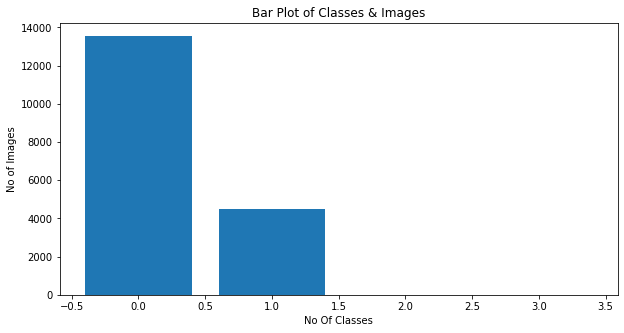

In [ ]:

numOfSample=[]

for x in range(0,4):
	numOfSample.append(len(np.where(y_train==x)[0]))

plt.figure(figsize=(10,5))
plt.bar(range(0, 4),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()

In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:

import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import csv
import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image
#from tensorflow.keras_retinanet import layers
#import keras.backend as k
#import keras_retinanet

In [ ]:
from keras.applications import resnet
model = resnet.ResNet50

In [ ]:
import tensorflow
resnet = model(include_top=False, weights='imagenet', input_shape=(176, 208, 3))

inp = Input((176,208,3))
x = resnet(inp)
x = tensorflow.keras.layers.GlobalAveragePooling2D()(x)
out = Dense(4, activation='softmax')(x)

model = Model(inp,out)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
import tensorflow as tf  
#stop training is model accuracy reached 99% 
class myCallback(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}): 
    if(logs.get('val_accuracy')>0.99): 
      self.model.stop_training = True

In [ ]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
es = myCallback() 
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 176, 208, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 6, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
Non-trainable params: 53,120
_________________________________________________________________


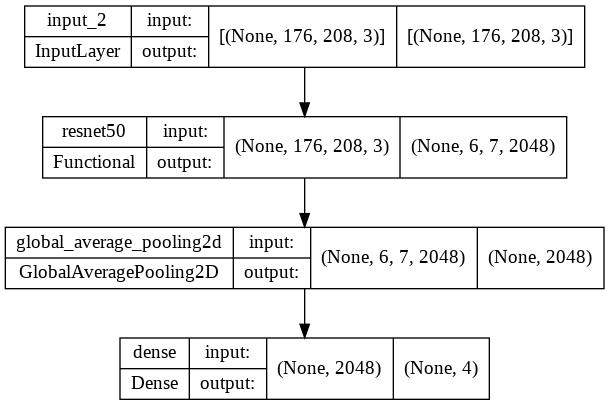

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot2.jpg', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf 

# Early Stopping
# es = EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

checkpoint_filepath='/content/dataset'

# Model Check point
# mc = ModelCheckpoint(filepath=checkpoint_filepath, 
#                      monitor='val_accuracy',
#                      min_delta=0.01,
#                      patience=3,
#                      verbose=1,
#                      save_best_only=True)

#model_checkpoint_callback
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

cb = [es,mc]

In [ ]:
history = model.fit(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=50, verbose=1,
    callbacks=cb
    )
model.load_weights(checkpoint_filepath)

Epoch 1/50
564/564 [==============================] - 84s 109ms/step - loss: 0.3841 - accuracy: 0.8148 - val_loss: 4.1073 - val_accuracy: 0.2646
Epoch 2/50
564/564 [==============================] - 60s 106ms/step - loss: 0.3018 - accuracy: 0.8531 - val_loss: 0.2678 - val_accuracy: 0.8770
Epoch 3/50
564/564 [==============================] - 65s 115ms/step - loss: 0.2637 - accuracy: 0.8689 - val_loss: 0.3048 - val_accuracy: 0.8115
Epoch 4/50
564/564 [==============================] - 58s 103ms/step - loss: 0.2379 - accuracy: 0.8886 - val_loss: 0.2433 - val_accuracy: 0.8912
Epoch 5/50
564/564 [==============================] - 58s 103ms/step - loss: 0.2220 - accuracy: 0.9059 - val_loss: 0.2077 - val_accuracy: 0.9168
Epoch 6/50
564/564 [==============================] - 56s 100ms/step - loss: 0.2183 - accuracy: 0.9088 - val_loss: 15.8209 - val_accuracy: 0.5168
Epoch 7/50
564/564 [==============================] - 56s 100ms/step - loss: 0.1819 - accuracy: 0.9241 - val_loss: 0.2106 - val_a

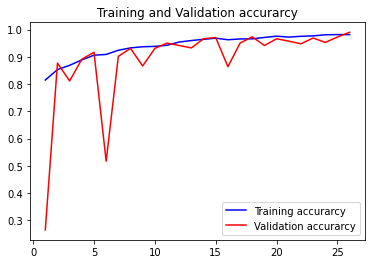

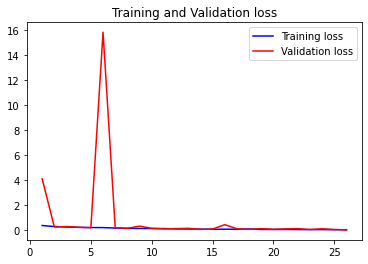

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
36/36 [==============================] - 3s 89ms/step - loss: 0.0331 - accuracy: 0.9903
Test Accuracy: 99.02654886245728
